In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [16]:
model = torch.load('../data_storage/CNN_L16_N100.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[ 0.0661,  0.2565,  0.3169, -0.1300],
                        [-0.1386,  0.0898,  0.0265,  0.1835],
                        [ 0.0089,  0.2392,  0.1719,  0.3259],
                        [ 0.1206, -0.1041, -0.2468, -0.1995]]],
              
              
                      [[[ 0.2312, -0.0171,  0.0824,  0.0799],
                        [-0.2048, -0.1561, -0.1760, -0.1904],
                        [ 0.1787, -0.1189, -0.1104,  0.0614],
                        [ 0.1941, -0.2109,  0.2433,  0.1191]]],
              
              
                      [[[ 0.0986,  0.2784, -0.0223,  0.0075],
                        [ 0.3488,  0.2658,  0.1659,  0.1997],
                        [-0.2043,  0.3189,  0.2529, -0.1454],
                        [-0.2190,  0.3374,  0.0691,  0.1742]]],
              
              
                      [[[-0.0799,  0.2056,  0.1932,  0.1742],
                        [-0.2759, -0.0103,  0.0399,  0.0402],
     

In [17]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[ 0.0661,  0.2565,  0.3169, -0.1300],
          [-0.1386,  0.0898,  0.0265,  0.1835],
          [ 0.0089,  0.2392,  0.1719,  0.3259],
          [ 0.1206, -0.1041, -0.2468, -0.1995]]],


        [[[ 0.2312, -0.0171,  0.0824,  0.0799],
          [-0.2048, -0.1561, -0.1760, -0.1904],
          [ 0.1787, -0.1189, -0.1104,  0.0614],
          [ 0.1941, -0.2109,  0.2433,  0.1191]]],


        [[[ 0.0986,  0.2784, -0.0223,  0.0075],
          [ 0.3488,  0.2658,  0.1659,  0.1997],
          [-0.2043,  0.3189,  0.2529, -0.1454],
          [-0.2190,  0.3374,  0.0691,  0.1742]]],


        [[[-0.0799,  0.2056,  0.1932,  0.1742],
          [-0.2759, -0.0103,  0.0399,  0.0402],
          [ 0.1054,  0.1031,  0.3031, -0.0893],
          [ 0.1854, -0.0963,  0.1735, -0.2466]]],


        [[[-0.1994,  0.1409,  0.1269, -0.1833],
          [-0.1483,  0.0164,  0.2315,  0.1863],
          [-0.1846,  0.2557,  0.2143, -0.2083],
          [-0.1610, -0.2029, -0.0702,  0.1934]]]])

In [18]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.numpy()

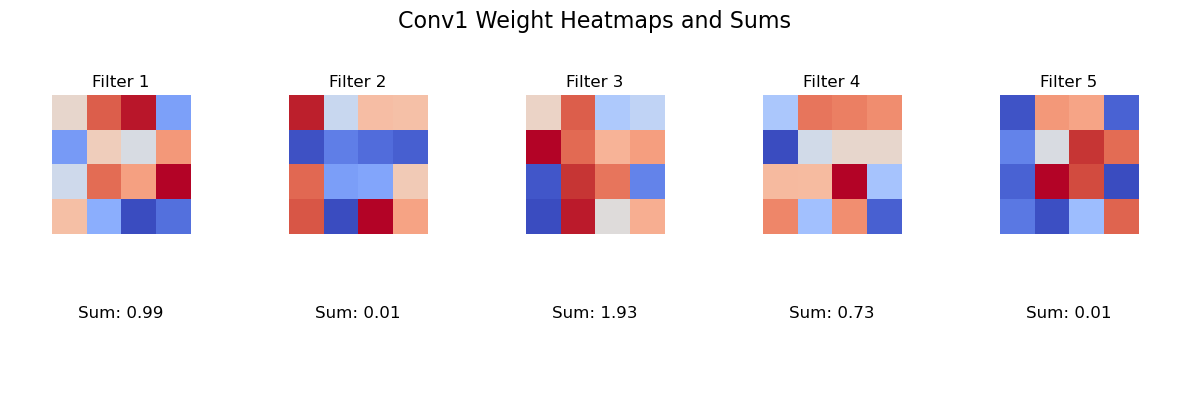

In [19]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [20]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[ 0.0264,  0.0448, -0.0314,  ...,  0.0228, -0.0535,  0.0623],
        [-0.0116,  0.0578, -0.0152,  ..., -0.1001,  0.0179, -0.0157],
        [ 0.0014, -0.0316,  0.0965,  ...,  0.0968, -0.0779,  0.0384],
        ...,
        [-0.1949, -0.1146, -0.1190,  ..., -0.0846,  0.0599, -0.0412],
        [-0.0403, -0.0659, -0.1961,  ..., -0.1261,  0.0326, -0.0520],
        [-0.1946, -0.2267, -0.1075,  ..., -0.0265, -0.0901, -0.1189]])

In [21]:
fc_weight.size()

torch.Size([100, 80])

In [22]:
# NumPy配列に変換
fc_weight_np = fc_weight.numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [23]:
fc_weight_np_square

array([[ 0.02639437, -0.01161059,  0.00142932, ..., -0.19490997,
        -0.04032267, -0.19457527],
       [ 0.04478423,  0.05777758, -0.03163841, ..., -0.11455237,
        -0.06590682, -0.22667344],
       [-0.03139135, -0.01522253,  0.096502  , ..., -0.11897503,
        -0.1960677 , -0.10751225],
       ...,
       [ 0.02281369, -0.100119  ,  0.09684049, ..., -0.08458744,
        -0.12610783, -0.02653996],
       [-0.05345234,  0.0179333 , -0.07786445, ...,  0.05989576,
         0.03260362, -0.09008364],
       [ 0.0622554 , -0.01570103,  0.03844078, ..., -0.0411613 ,
        -0.05200715, -0.11889424]], dtype=float32)

In [24]:
fc_weight_np_square.shape

(80, 100)

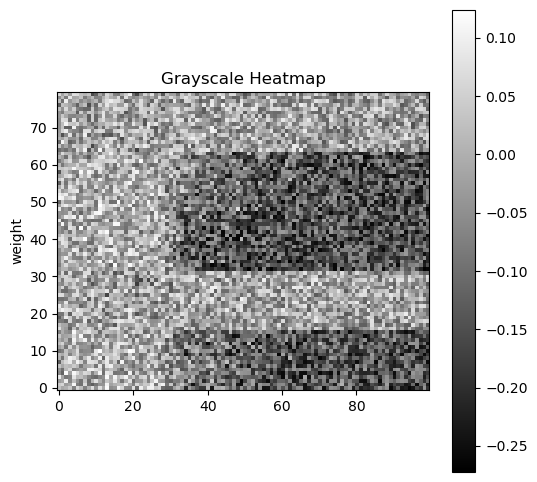

In [25]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [26]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([-1.4073609 , -0.46842024,  0.13605276, -0.57811207,  0.15422346,
       -0.5182584 , -1.6229776 ,  0.1345151 , -1.6947904 , -1.3972985 ,
       -2.2694101 ,  1.2570956 , -0.5484951 ,  0.48475772, -0.8192936 ,
        0.29209223,  0.5025496 , -1.1981542 , -0.8226775 , -0.32202578,
       -0.55362415, -2.2731085 , -1.0306154 , -0.28378767, -0.566844  ,
       -0.53647685, -1.3062122 , -0.67488676, -1.261096  , -3.4752944 ,
       -2.3199937 , -2.0652742 , -3.4876926 , -3.6812162 , -5.829276  ,
       -4.276496  , -4.0403633 , -6.0808816 , -6.06554   , -6.2266703 ,
       -5.8380537 , -5.306604  , -6.160592  , -6.3099785 , -6.3927665 ,
       -6.6170197 , -6.0731416 , -6.0822153 , -6.6628513 , -6.3113728 ,
       -7.7054157 , -7.230867  , -7.5380917 , -7.2690105 , -6.7473664 ,
       -7.0680413 , -7.8603544 , -7.4801846 , -7.9871383 , -7.637667  ,
       -8.403894  , -6.5423946 , -7.821322  , -7.471364  , -6.7489185 ,
       -8.17838   , -7.8218756 , -7.822913  , -7.641106  , -7.50

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = [x for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# tanh関数の定義
def tanh_function(x, a, b):
    return a * np.tanh(b * x)

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y)

# 推定されたパラメータを使用して近似線を計算
y_fit = tanh_function(x, *params)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.plot(x, y_fit, label='tanh', linestyle='--', color='red')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')

plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

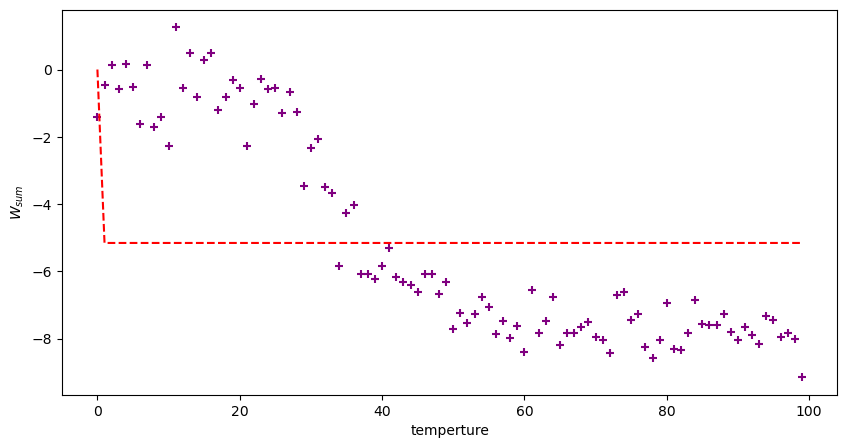

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.arange(len(fc_weight_np_square_sum))  # xをNumPy配列に変換
y = fc_weight_np_square_sum

# tanh関数の定義
def tanh_function(x, a, b):
    return a * np.tanh(b * x)

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y)

# 推定されたパラメータを使用して近似線を計算
y_fit = tanh_function(x, *params)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.plot(x, y_fit, label='tanh', linestyle='--', color='red')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')
plt.show()


In [ ]:
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

x_inverse

[0,
 1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05,
 0.047619047619047616,
 0.045454545454545456,
 0.043478260869565216,
 0.041666666666666664,
 0.04,
 0.038461538461538464,
 0.037037037037037035,
 0.03571428571428571,
 0.034482758620689655,
 0.03333333333333333,
 0.03225806451612903,
 0.03125,
 0.030303030303030304,
 0.029411764705882353,
 0.02857142857142857,
 0.027777777777777776,
 0.02702702702702703,
 0.02631578947368421,
 0.02564102564102564,
 0.025,
 0.024390243902439025,
 0.023809523809523808,
 0.023255813953488372,
 0.022727272727272728,
 0.022222222222222223,
 0.021739130434782608,
 0.02127659574468085,
 0.020833333333333332,
 0.02040816326530612,
 0.02,
 0.0196078431372549,
 0.019230769230769232,
 0.0188679245

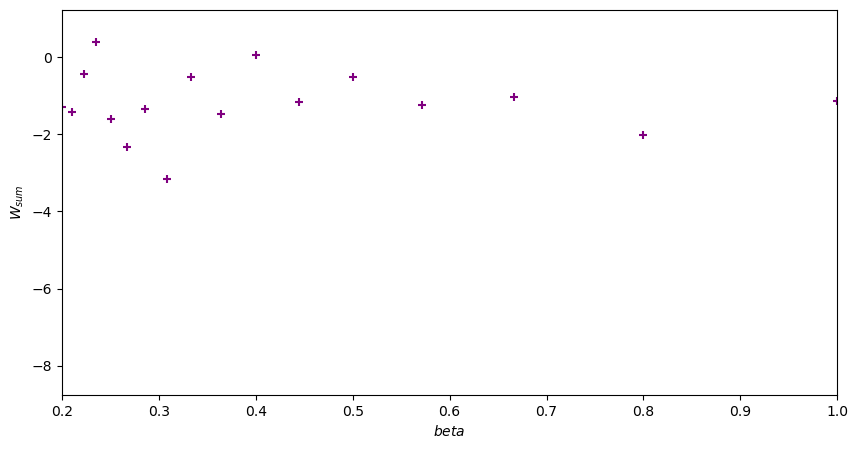

In [ ]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# x軸の値を逆数に変換
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x_inverse, y, marker='+', color='purple')
plt.xlabel('$beta$')
plt.ylabel('$W_{sum}$')

# x軸の範囲を指定
plt.xlim(0.2, 1) 

plt.show()